1. Import packages, read data & explore
2. Perform EDA
   - Handle missing data
   - 5 point summary
   - Detect & solve outliers
   - Check data distribution, is it balanced
   - Get correlation value
   - Label encoding
   - Change data type
   - Remove columns
   - Pairplot
   - Scale data (StandardScaler or z_score)
3. Split data (70:30)
4. Model building
   - Logistic Regression
   - Naive Bayes
   - KNN
   - SVC
   - Decision tree
       - Feature importance test for DT
       - Prunning DT
5. Ensemble models
   - Bagging
   - Adaptive Boosting
   - Gradient boosting
   - Random Forest
7. Models with accuracy scores
8. Conclusion
   - comments on dataset
   - on models
   - miscellaneous

## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In /home/myself/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/myself/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/myself/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/myself/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/myself/anaconda3/lib/python3.7/site-packages/matplo

In [2]:
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, \
                                  MinMaxScaler, \
                                  RobustScaler, \
                                  LabelEncoder

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [4]:
from IPython.display import Image
from os import system
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
#import pydotplus
#import graphviz

In [5]:
from sklearn.ensemble import BaggingClassifier, \
                             AdaBoostClassifier, \
                             GradientBoostingClassifier, \
                             RandomForestClassifier

In [6]:
from statistics import median,mean
from sklearn.metrics import accuracy_score, \
                            confusion_matrix, \
                            classification_report, \
                            roc_auc_score, \
                            precision_score, \
                            recall_score

## Import data

In [7]:
df = pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.shape

(45211, 17)

In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

## EDA

### Check categories

In [13]:
for col in df.select_dtypes('object'):
    print(df[col].value_counts())
    print('')

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

no     44396
yes      815
Name: default, dtype: int64

yes    25130
no     20081
Name: housing, dtype: int64

no     37967
yes     7244
Name: loan, dtype: int64

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype:

In [18]:
cols = df.select_dtypes('object').columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')

In [19]:
df[cols] = df[cols].apply(pd.Categorical)
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

### Check missing values

In [20]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

### Check distribution of nummerical features

#### 5 point summary

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Comparing the min/max with mean+std, we see that age has outliers.

&mu;    = 40  
&sigma; = 10  
&mu;+3&sigma; = 70  
max = 95

In also the case in balance, duration, campaign, pdays, previous — so all of them except day.

#### displot

In [29]:
df.select_dtypes(exclude=['category']).columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

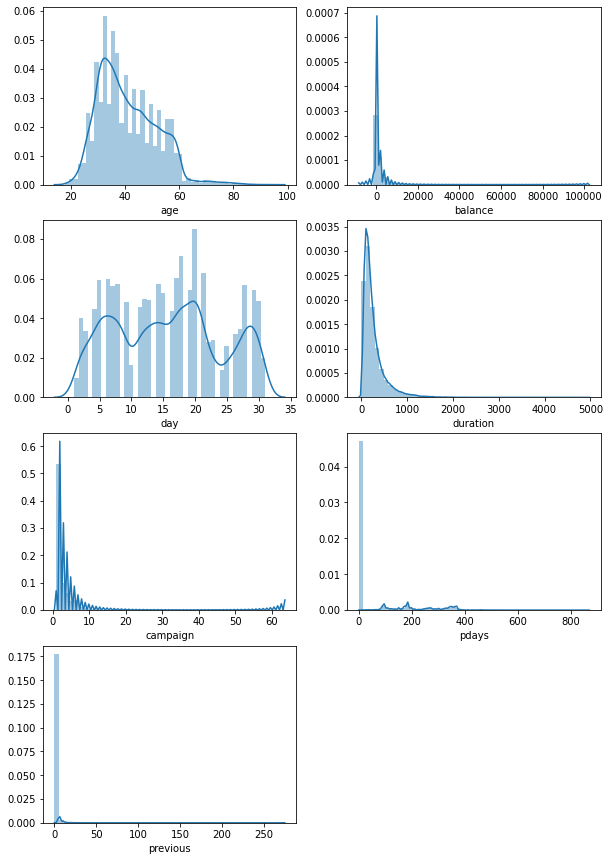

In [30]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,15))
ax = ax.flatten()
i  = 0

for col in df.select_dtypes('int64').columns:
    sns.distplot(df[col], ax=ax[i])
    i += 1

ax.flat[-1].set_visible(False)

#### skewness

In [40]:
df.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

#### boxplot

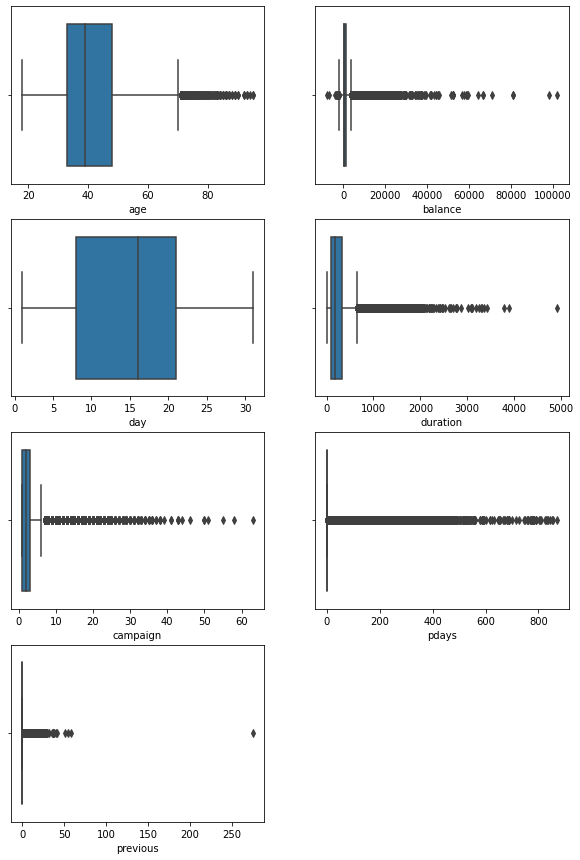

In [41]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,15))
ax = ax.flatten()
i  = 0

for col in df.select_dtypes('int64').columns:
    sns.boxplot(df[col], ax=ax[i])
    i += 1

ax.flat[-1].set_visible(False)

### Check distribution of categorical feature

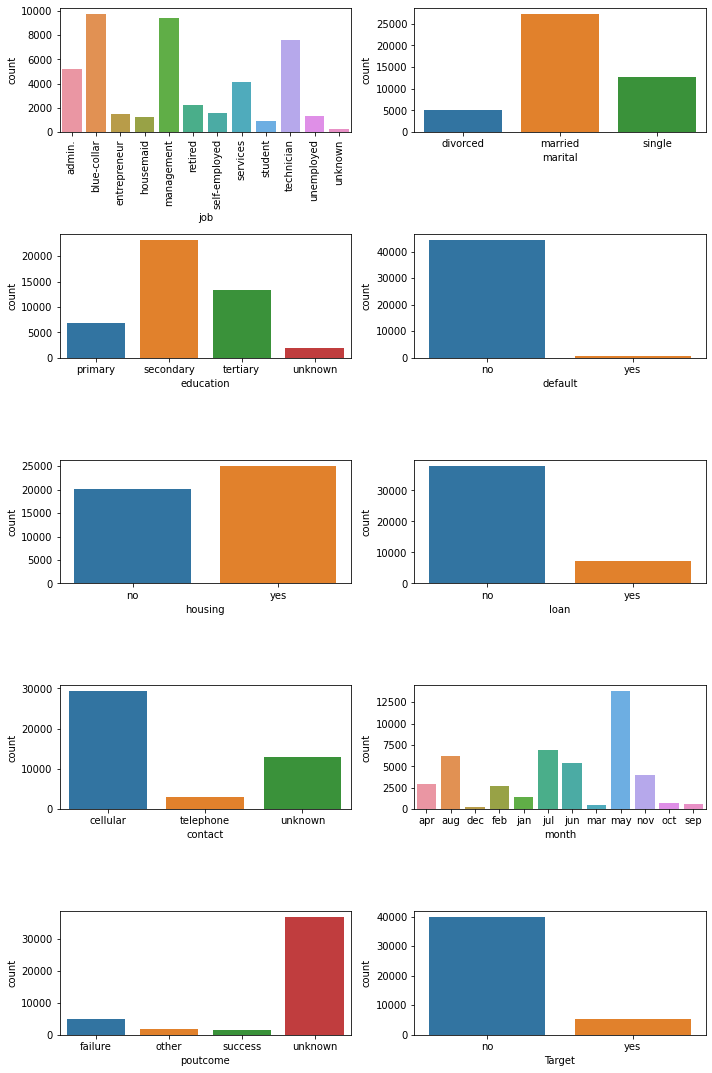

In [39]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10,15))
ax = ax.flatten()
i  = 0

for col in df.select_dtypes('category').columns:
    sns.countplot(x=df[col], data=df, ax=ax[i])

    if i==0:
        ax[i].tick_params(rotation=90, axis='x')
    i += 1

fig.tight_layout()

Most customers have been contacted in may, with their cellular number  
Most people have a house loan  
Around 6% of customers have credit in default

### Label Encoding

In [50]:
df2     = df.copy()
cols    = df.select_dtypes('category').columns
encoder = LabelEncoder()

for col in cols:
    df2[col] = encoder.fit_transform(df[col]).astype(int)

df2[cols] = df2[cols].apply(pd.Categorical)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [51]:
df2.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

### Handle outliers

We will use mean replacement

In [56]:
# Replace outliers > Q3 with mean
cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for col in cols:
    mean = df2[col].mean()
    Q3   = np.percentile(df2[col], 75)

    df2[col] = np.where(df2[col] > Q3, mean, df2[col])

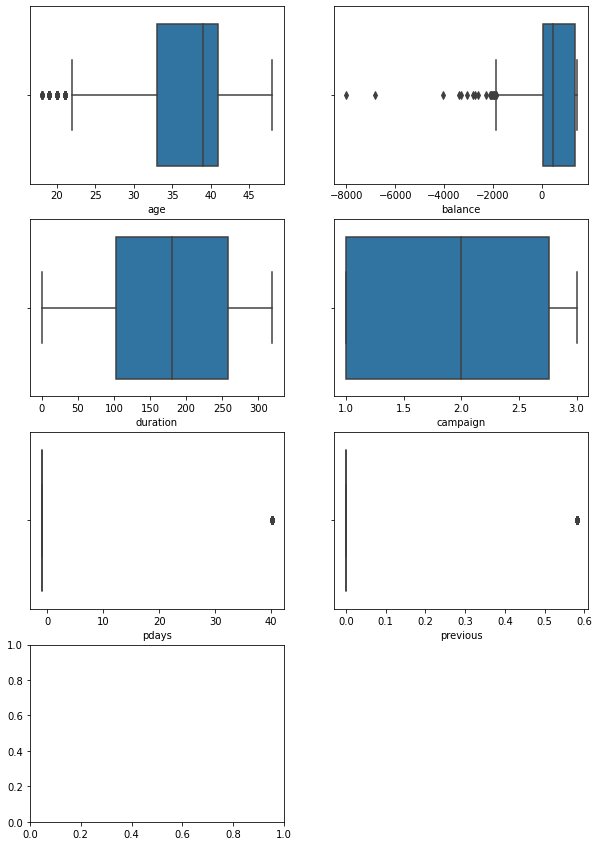

In [58]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,15))
ax = ax.flatten()
i  = 0

for col in cols:
    sns.boxplot(df2[col], ax=ax[i])
    i += 1

ax.flat[-1].set_visible(False)

### Plot correlation

<AxesSubplot:>

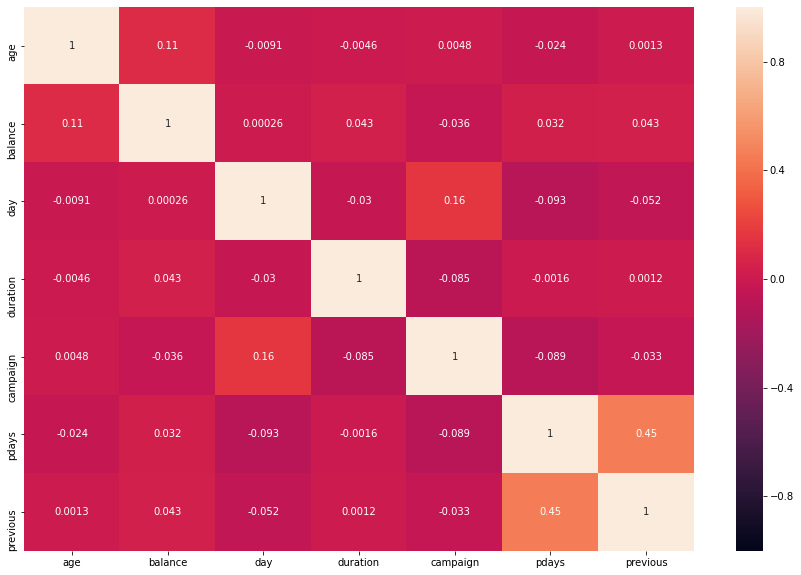

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1)

<AxesSubplot:>

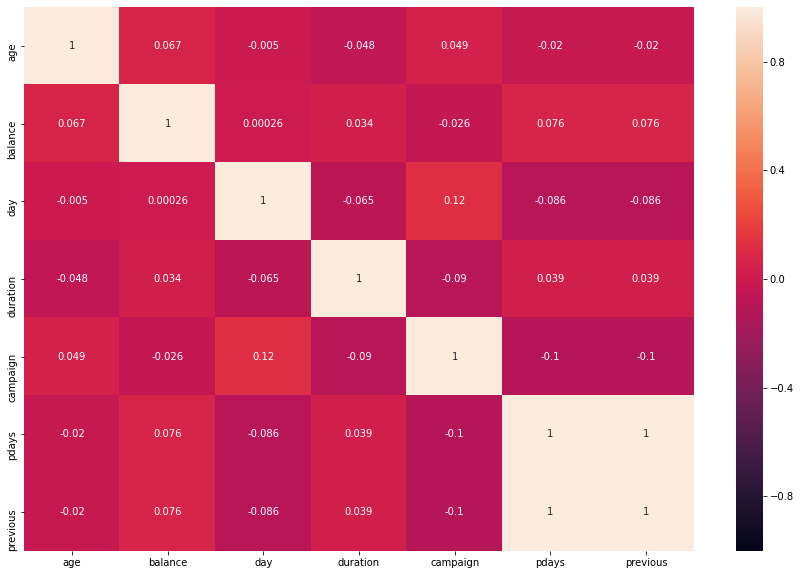

In [62]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(), annot=True, vmax=1, vmin=-1)

### Remove columns

In [63]:
df2.drop(['job', 'education', 'contact', \
          'duration', 'pdays', 'day', 'month'], axis=1, inplace=True)
df2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,40.93621,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44.00000,2,0,29.000000,1,0,1.0,0.0,3,0
2,33.00000,1,0,2.000000,1,1,1.0,0.0,3,0
3,47.00000,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33.00000,2,0,1.000000,0,0,1.0,0.0,3,0


### Pairplot

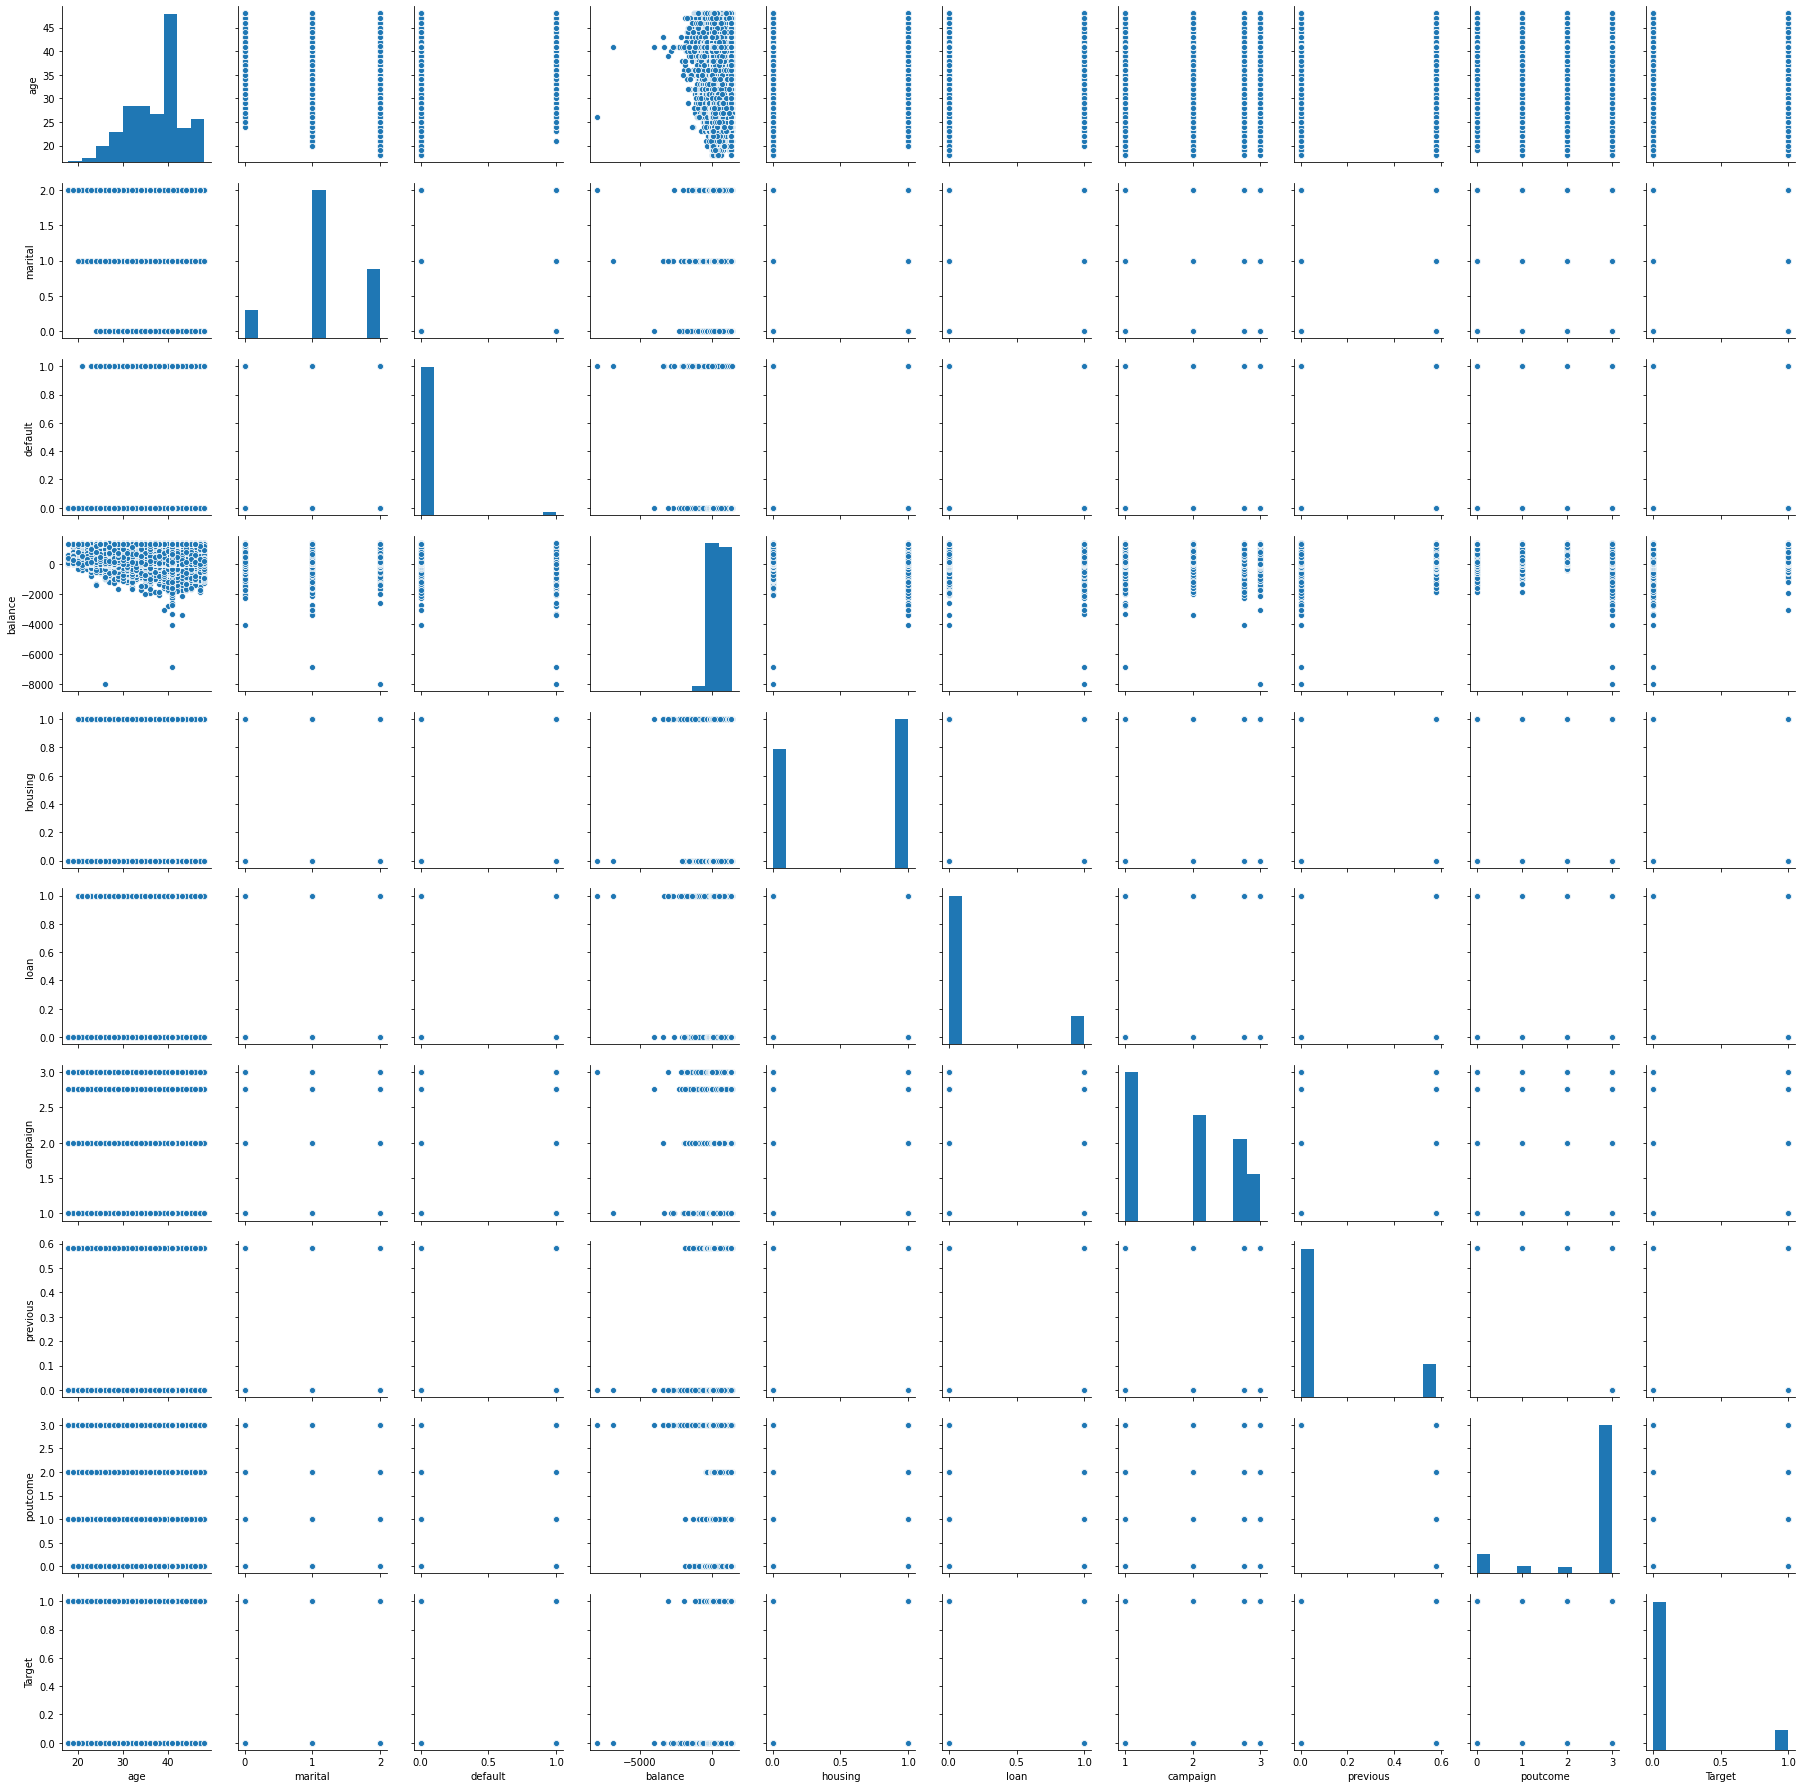

In [64]:
sns.pairplot(df2)

---

## Split data

In [65]:
X = df2.drop('Target', axis=1)
y = df2['Target']

print(X.shape)
print(y.shape)

(45211, 9)
(45211,)


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2)

print(X_train.shape)
print(y_train.shape)

(31647, 9)
(31647,)


## Scale data

In [67]:
scaler   = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2  = scaler.transform(X_test)

## Build model

### Logistic Regression Model

In [71]:
logic_r = LogisticRegression(solver='liblinear')
logic_r.fit(X_train2, y_train)

In [133]:
y_pred = logic_r.predict(X_test2)

Confusion Matrix
 [[11885   114]
 [ 1318   247]]


In [134]:
logic_r_accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix\n', confusion_matrix(y_test, y_pred), '\n')
print('Accuracy Score\n', logic_r_accuracy, '\n')
print('Classification Report\n', classification_report(y_test, y_pred))

Confusion Matrix
 [[11885   114]
 [ 1318   247]] 

Accuracy Score
 0.894426422884105 

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.68      0.16      0.26      1565

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



### Naive Bayes

In [76]:
NB = GaussianNB()
NB.fit(X_train2, y_train)

In [135]:
y_pred = NB.predict(X_test2)

In [136]:
nb_accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix\n', confusion_matrix(y_test, y_pred), '\n')
print('Accuracy Score\n', nb_accuracy, '\n')
print('Classification Report\n', classification_report(y_test, y_pred), '\n')

Confusion Matrix
 [[10687  1312]
 [ 1082   483]] 

Accuracy Score
 0.8235033913299912 

Classification Report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     11999
           1       0.27      0.31      0.29      1565

    accuracy                           0.82     13564
   macro avg       0.59      0.60      0.59     13564
weighted avg       0.83      0.82      0.83     13564
 



### KNN

In [78]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train2, y_train)

In [137]:
y_pred = knn.predict(X_test2)

In [138]:
knn_accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix\n', confusion_matrix(y_test, y_pred), '\n')
print('Accuracy Score\n', knn_accuracy, '\n')
print('Classification Report\n', classification_report(y_test, y_pred), '\n')

Confusion Matrix
 [[11435   564]
 [ 1243   322]] 

Accuracy Score
 0.8667797109997051 

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.95      0.93     11999
           1       0.36      0.21      0.26      1565

    accuracy                           0.87     13564
   macro avg       0.63      0.58      0.59     13564
weighted avg       0.84      0.87      0.85     13564
 



### SVC

In [139]:
svc = SVC()
svc.fit(X_train2, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [140]:
y_pred = svc.predict(X_test2)

In [141]:
svc_accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix\n', confusion_matrix(y_test, y_pred), '\n')
print('Accuracy Score\n', svc_accuracy, '\n')
print('Classification Report\n', classification_report(y_test, y_pred), '\n')

Confusion Matrix
 [[11856   143]
 [ 1284   281]] 

Accuracy Score
 0.8947950457092303 

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.66      0.18      0.28      1565

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564
 



### Decision Tree

In [82]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train2, y_train)

In [142]:
y_pred = dt.predict(X_test2)

In [143]:
dt_accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix\n', confusion_matrix(y_test, y_pred), '\n')
print('Accuracy Score\n', dt_accuracy, '\n')
print('Classification Report\n', classification_report(y_test, y_pred), '\n')

Confusion Matrix
 [[11091   908]
 [ 1241   324]] 

Accuracy Score
 0.8415659097611324 

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     11999
           1       0.26      0.21      0.23      1565

    accuracy                           0.84     13564
   macro avg       0.58      0.57      0.57     13564
weighted avg       0.83      0.84      0.83     13564
 



#### Feature importance test

In [86]:
dt.feature_importances_

array([0.20704384, 0.05066561, 0.00515358, 0.48852109, 0.02411437,
       0.02600765, 0.06465889, 0.03743262, 0.09640235])

In [96]:
dt.feature_importances_.shape

(9,)

In [97]:
X_train.columns.shape

(9,)

In [108]:
pd.Series(
    data=dt.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

balance     0.488521
age         0.207044
poutcome    0.096402
campaign    0.064659
marital     0.050666
previous    0.037433
loan        0.026008
housing     0.024114
default     0.005154
dtype: float64

---

## Ensemble techniques

### Bagging

In [111]:
bag = BaggingClassifier(base_estimator=dt, n_estimators=500)
bag.fit(X_train2, y_train)

In [144]:
y_pred = bag.predict(X_test2)

In [145]:
bag_accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix\n', confusion_matrix(y_test, y_pred), '\n')
print('Accuracy Score\n', bag_accuracy, '\n')
print('Classification Report\n', classification_report(y_test, y_pred), '\n')

Confusion Matrix
 [[11613   386]
 [ 1275   290]] 

Accuracy Score
 0.8775434974933648 

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     11999
           1       0.43      0.19      0.26      1565

    accuracy                           0.88     13564
   macro avg       0.67      0.58      0.60     13564
weighted avg       0.85      0.88      0.86     13564
 



### AdaBoosting

In [115]:
ada = AdaBoostClassifier(n_estimators=50)
ada.fit(X_train2, y_train)

In [146]:
y_pred = ada.predict(X_test2)

In [147]:
ada_accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix\n', confusion_matrix(y_test, y_pred), '\n')
print('Accuracy Score\n', ada_accuracy, '\n')
print('Classification Report\n', classification_report(y_test, y_pred), '\n')

Confusion Matrix
 [[11886   113]
 [ 1320   245]] 

Accuracy Score
 0.8943526983190799 

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.68      0.16      0.25      1565

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564
 



### Random Forest

In [117]:
rf = RandomForestClassifier(n_estimators=100, max_features=3)
rf.fit(X_train2, y_train)

In [148]:
y_pred = rf.predict(X_test2)

In [149]:
rf_accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix\n', confusion_matrix(y_test, y_pred), '\n')
print('Accuracy Score\n', rf_accuracy, '\n')
print('Classification Report\n', classification_report(y_test, y_pred), '\n')

Confusion Matrix
 [[11510   489]
 [ 1249   316]] 

Accuracy Score
 0.8718667059864347 

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.39      0.20      0.27      1565

    accuracy                           0.87     13564
   macro avg       0.65      0.58      0.60     13564
weighted avg       0.84      0.87      0.85     13564
 



### Gradient Boosting

In [129]:
grad = GradientBoostingClassifier(n_estimators=100)
grad.fit(X_train2, y_train)

In [150]:
y_pred = grad.predict(X_test2)

In [151]:
grad_accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix\n', confusion_matrix(y_test, y_pred), '\n')
print('Accuracy Score\n', grad_accuracy, '\n')
print('Classification Report\n', classification_report(y_test, y_pred), '\n')

Confusion Matrix
 [[11867   132]
 [ 1293   272]] 

Accuracy Score
 0.8949424948392805 

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.67      0.17      0.28      1565

    accuracy                           0.89     13564
   macro avg       0.79      0.58      0.61     13564
weighted avg       0.88      0.89      0.87     13564
 



## Compare scores

In [157]:
scores = [
    ('Naive bayes', nb_accuracy),
    ('KNN', knn_accuracy),
    ('Logistic reg', logic_r_accuracy),
    ('SVC', svc_accuracy),
    ('Decision tree', dt_accuracy),
    ('Bagging', bag_accuracy),
    ('Adaptive boosting', ada_accuracy),
    ('Random forest', rf_accuracy),
    ('Gradient boosting', grad_accuracy)
]
pd.DataFrame(scores, columns=['Model','Accuracy score']) \
  .sort_values(by='Accuracy score', ascending=False)

,Model,Accuracy score
8,Gradient boosting,0.894942
3,SVC,0.894795
2,Logistic reg,0.894426
6,Adaptive boosting,0.894353
5,Bagging,0.877543
7,Random forest,0.871867
1,KNN,0.866780
4,Decision tree,0.841566
0,Naive bayes,0.823503


## Conclusion

1. The models perform well at predicting the class 0
2. It does not perform well at predicting the class 1 (the recall & precision is low), because it doesn't have a lot of data
3. The ratio between class 0 and 1 is high. We could have better results is the dataset was balanced